<a href="https://colab.research.google.com/github/Son-github/ML-chapter8_3/blob/main/chapter8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
from keras.api._v2.keras import callbacks
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 5ms/step - loss: 0.5142 - accuracy: 0.8148 - val_loss: 0.3219 - val_accuracy: 0.8797
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3419 - accuracy: 0.8757 - val_loss: 0.2776 - val_accuracy: 0.8981
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2929 - accuracy: 0.8944 - val_loss: 0.2833 - val_accuracy: 0.8959
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2621 - accuracy: 0.9051 - val_loss: 0.2384 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2411 - accuracy: 0.9114 - val_loss: 0.2354 - val_accuracy: 0.9126
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2227 - accuracy: 0.9184 - val_loss: 0.2349 - val_accuracy: 0.9128
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2056 - accuracy: 0.9234 - val_loss: 0.2299 - val_accuracy

In [5]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [6]:
model.layers #keras 모델에 추가한 층을 보여줌.

In [7]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) #층의 가중치와 절편은 층의 weights 속성에 저장되어 있음. weights의 첫 번째 원소는 가중치, 두 번째 원소는 절편(필터마다 1개의 절면이 있으므로)

(3, 3, 1, 32) (32,)


In [8]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.032671962 0.2863588


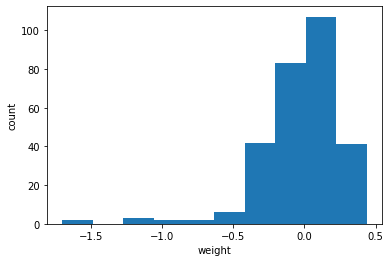

In [9]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

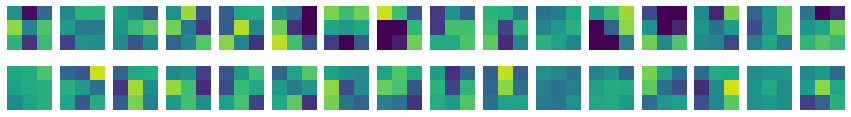

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) #imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현. 어떤 절댓값을 기준으로 정해 픽셀의 강도를 나타내서 비교하기 위해 vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위 지정.
    axs[i,j].axis('off')
plt.show() #앞에서 conv_weights에 32개의 가중치를 저장함. 따라서 conv_weights[:,:,0,0]에서 conv_weights[:,:,0,31]까지 출력

In [11]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #훈련하지 않은 빈 합성곱 신경망

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std()) #훈련하지 않은 빈 합성곱 신경망은 평균은 이전과 동일하게 0에 가깝지만 표준편차는 이전과 달리 매우 작다.

0.0003325335 0.08182801


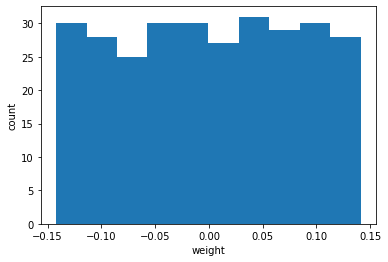

In [14]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() #이전과 비교해 고른 분포를 보이는데 이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때, 균등 분포에서 랜덤하게 값을 선택하기 때문.

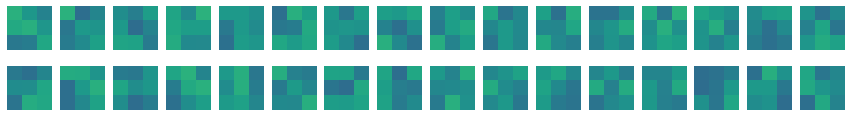

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show() #전체적으로 색깔이 비슷비슷함

In [16]:
print(model.input) #모델 입력을 얻음

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
conv_acti = keras.Model(model.input, model.layers[0].output) #model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만듬.

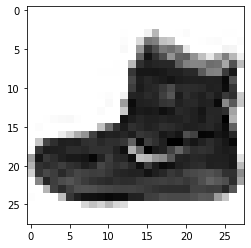

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [19]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 83ms/step


In [20]:
print(feature_maps.shape)

(1, 28, 28, 32)


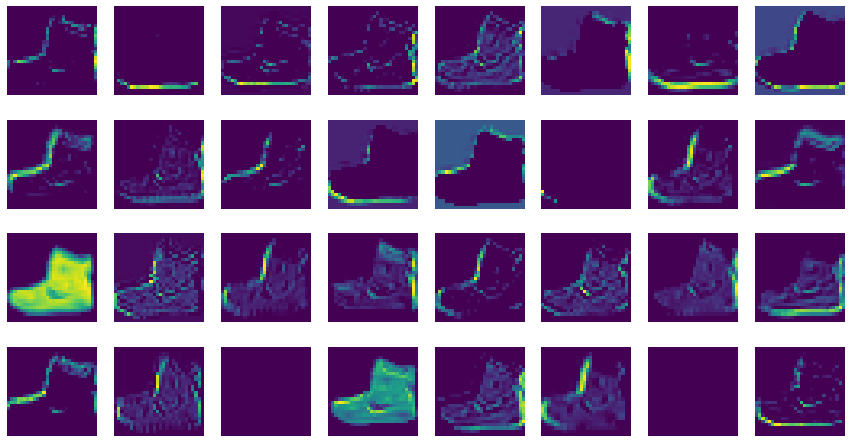

In [21]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [22]:
conv2_acti = keras.Model(model.input, model.layers[2].output) #model 객체의 입력과 두 번째 합성곱 층인 model.layer[2]의 출력을 연결한 conv2_acti모델을 만듬.

In [23]:
inputs = train_input[:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 80ms/step


In [24]:
print(feature_maps.shape)

(1, 14, 14, 64)


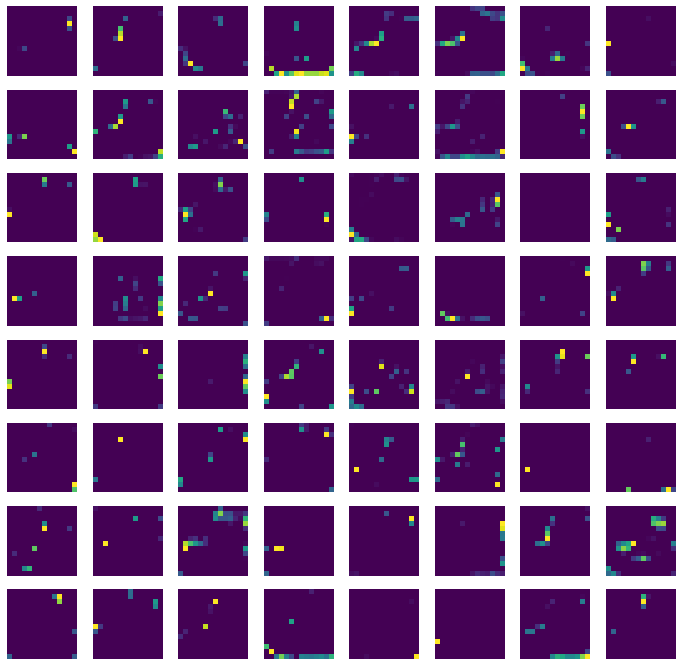

In [25]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()